## Initialize

### Packages

In [1]:
import numpy as np
import ROOT as root
import matplotlib
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/06


### Constants

In [11]:
bins_energy = np.loadtxt("input/bins_energy_piminus_p_2H.txt")
bins_theta = np.loadtxt("input/bins_theta_piminus_p_2H.txt")

mass_neutron = 0.93956542052
mass_proton  = 0.93827208816
mass_piminus = 0.13957039
mass_photon  = 0
RadToDeg = 180/np.pi

### Input

In [18]:
yield_data   = np.loadtxt("output/yield_count_data_piminus_p_2H.txt")
yield_sim    = np.loadtxt("output/yield_count_sim_piminus_p_2H.txt")
yield_thrown = np.loadtxt("output/yield_count_thrown_piminus_p_2H.txt")
error_data   = np.loadtxt("output/yield_error_data_piminus_p_2H.txt")
error_sim    = np.loadtxt("output/yield_error_sim_piminus_p_2H.txt")
error_thrown = np.loadtxt("output/yield_error_thrown_piminus_p_2H.txt")

transparency = np.loadtxt("output/transparency_piminus_p_2H.txt")

## Cross section

In [19]:
acceptance = yield_sim/yield_thrown
lumi = [17.9571131-16.9930015, 16.9930015-16.2575655, 16.2575655-14.8389824, 14.8389824-12.7206057, 12.7206057-7.6440912, 7.6440912-5.3673892, 5.3673892-3.6303735, 3.6303735-1.8942208, 1.8942208-0.1602483]
dOmega = np.sin(bins_theta[:,0]/RadToDeg)*5/RadToDeg*2*np.pi
cs = yield_data/transparency/acceptance/np.tile(dOmega, (np.shape(acceptance)[0], 1))/np.transpose(np.tile(lumi, (np.shape(acceptance)[1], 1)))/1000000
cs_error = cs*error_data/yield_data

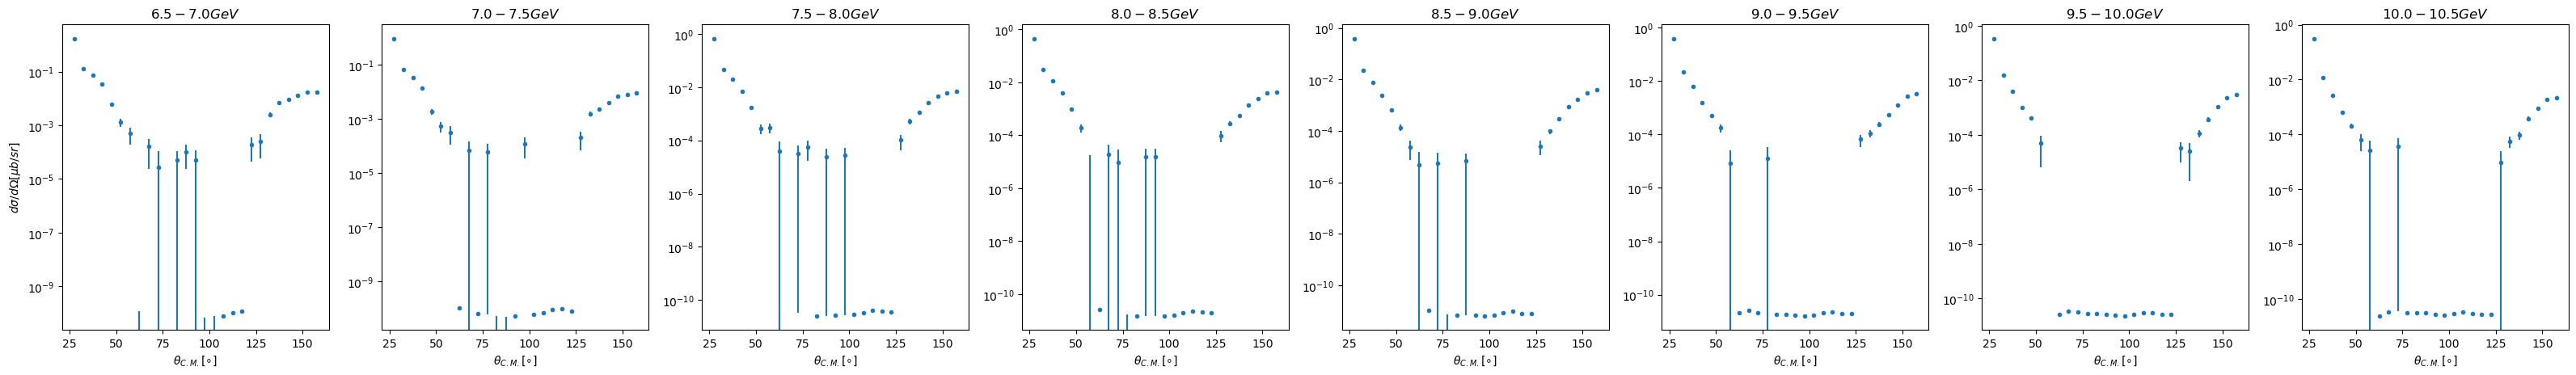

In [21]:
fig, ax = plt.subplots(1, 8, figsize=(40, 5), dpi=100)
ax[0].set_title("$6.5-7.0 GeV$")
ax[1].set_title("$7.0-7.5 GeV$")
ax[2].set_title("$7.5-8.0 GeV$")
ax[3].set_title("$8.0-8.5 GeV$")
ax[4].set_title("$8.5-9.0 GeV$")
ax[5].set_title("$9.0-9.5 GeV$")
ax[6].set_title("$9.5-10.0 GeV$")
ax[7].set_title("$10.0-10.5 GeV$")

for i in range(8):
    plt.axes(ax[i])
    if (i==0):
        plt.ylabel("$d\sigma/d\Omega [\mu b/sr]$")
    plt.xlabel("$\\theta_{C.M.}[\circ]$")
#     plt.ylim(0,0.1)
    plt.yscale('log')
        
    plt.errorbar(bins_theta[:,0], cs[i], yerr=cs_error[i], marker='.', fmt='o')

In [31]:
clas_results = np.loadtxt("input/clasdb_E32M2.txt", skiprows=8)[0:33]

In [22]:
energy_com = bins_energy[:,0]
energy_com = mass_neutron**2+2*mass_neutron*energy_com

In [23]:
pi_com = (energy_com*energy_com + mass_photon**4 + mass_neutron**4 - 2*mass_photon**2*mass_neutron**2 - 2*energy_com*mass_photon**2 - 2*energy_com*mass_neutron**2)/4/energy_com
pi_com = np.sqrt(pi_com)
pf_com = (energy_com*energy_com + mass_piminus**4 + mass_proton**4 - 2*mass_piminus**2*mass_proton**2 - 2*energy_com*mass_piminus**2 - 2*energy_com*mass_proton**2)/4/energy_com
pf_com = np.sqrt(pf_com)

In [24]:
scaled_cs = cs * np.transpose(np.tile(energy_com**7, (np.shape(acceptance)[1], 1))) * np.pi / np.transpose(np.tile(pi_com, (np.shape(acceptance)[1], 1))) / np.transpose(np.tile(pf_com, (np.shape(acceptance)[1], 1))) * 1000 / 10000000
scaled_cs_error = scaled_cs*error_data/yield_data

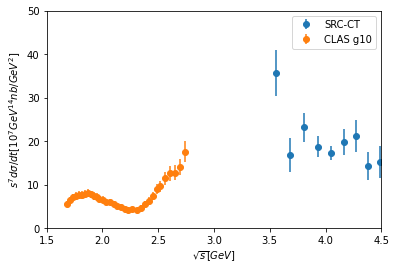

In [38]:
plt.errorbar(np.sqrt(energy_com), scaled_cs[:,4], yerr = scaled_cs_error[:,4], fmt='o', label="SRC-CT")
plt.errorbar(clas_results[:,1], clas_results[:,2], yerr = clas_results[:,3], fmt='o', label="CLAS g10")

plt.xlim(1.5, 4.5)
plt.ylim(0, 50)
plt.ylabel("$s^7 d\sigma/dt [10^7 GeV^{14} nb/GeV^2]$")
plt.xlabel("$\sqrt{s} [GeV]$")
plt.legend()

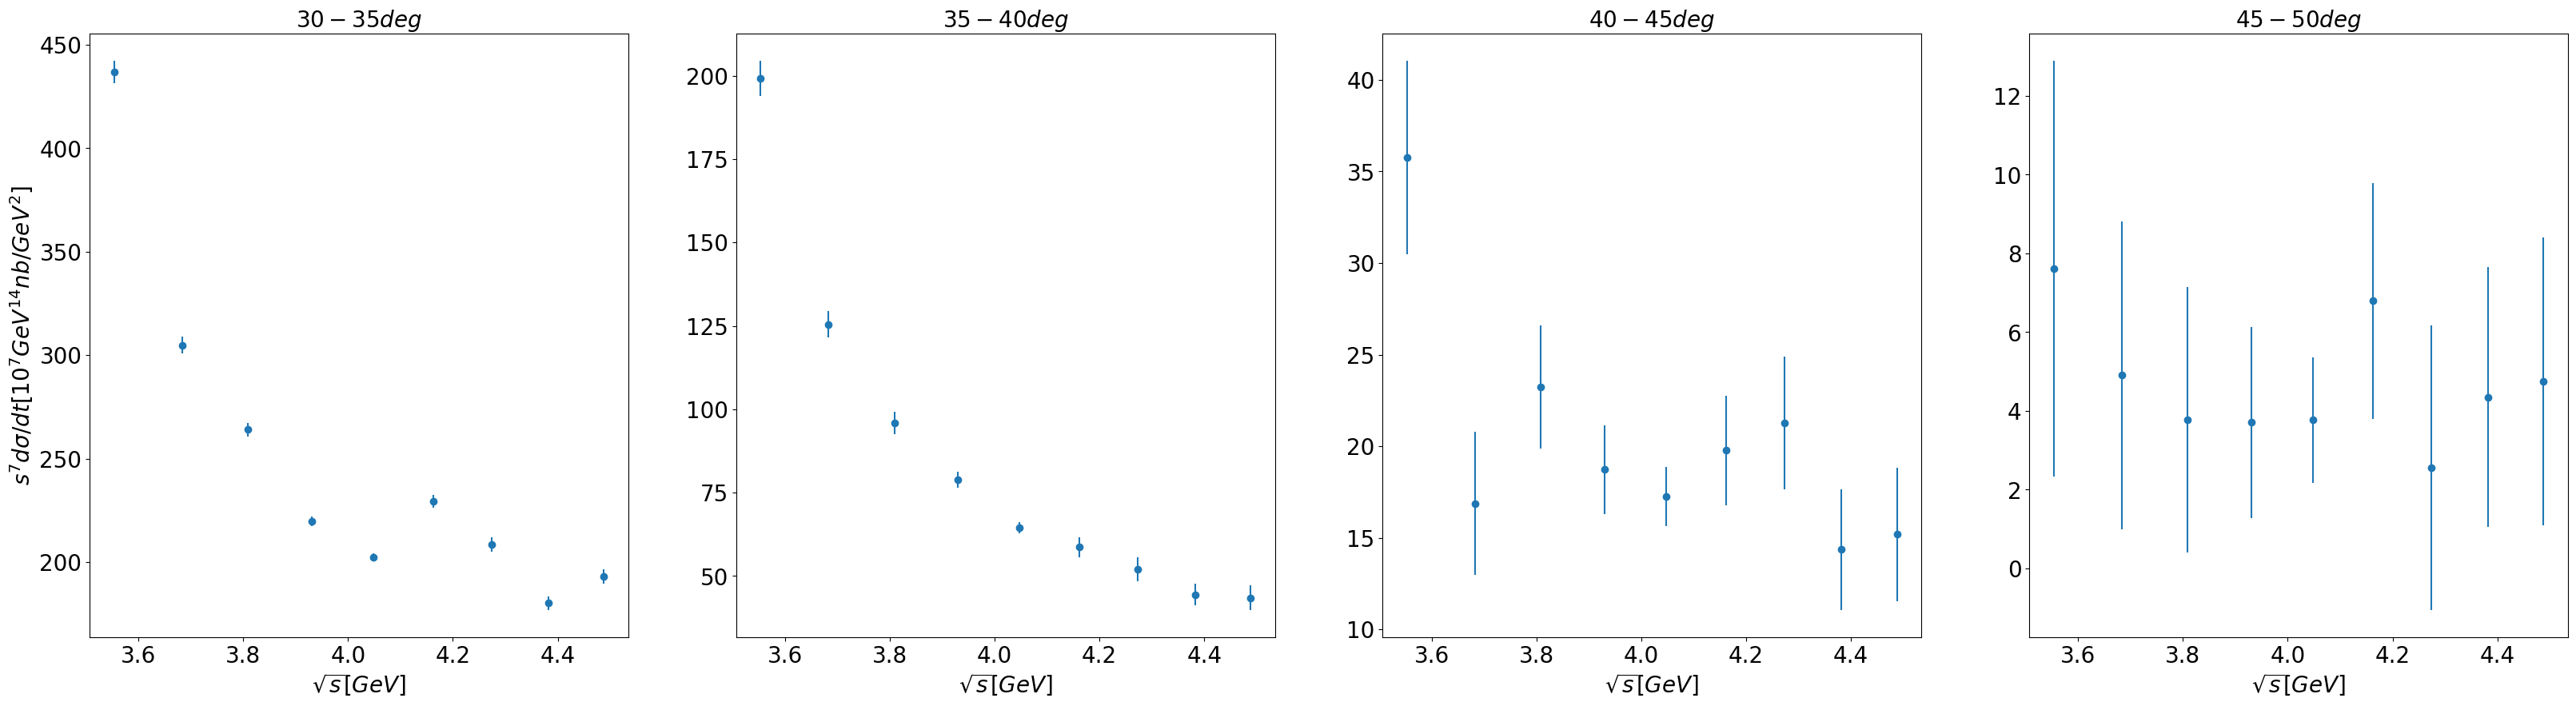

In [27]:
fig, ax = plt.subplots(1, 4, figsize=(40, 10), dpi=100)
ax[0].set_title("$30-35 deg$", fontsize=20)
ax[1].set_title("$35-40 deg$", fontsize=20)
ax[2].set_title("$40-45 deg$", fontsize=20)
ax[3].set_title("$45-50 deg$", fontsize=20)

for i in range(4):
    plt.axes(ax[i])
    if (i==0):
        plt.ylabel("$s^7 d\sigma/dt [10^7 GeV^{14} nb/GeV^2]$", fontsize=20)
    plt.xlabel("$\sqrt{s} [GeV]$", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
        
    plt.errorbar(np.sqrt(energy_com), scaled_cs[:,i+2], yerr = scaled_cs_error[:,4], fmt='o')

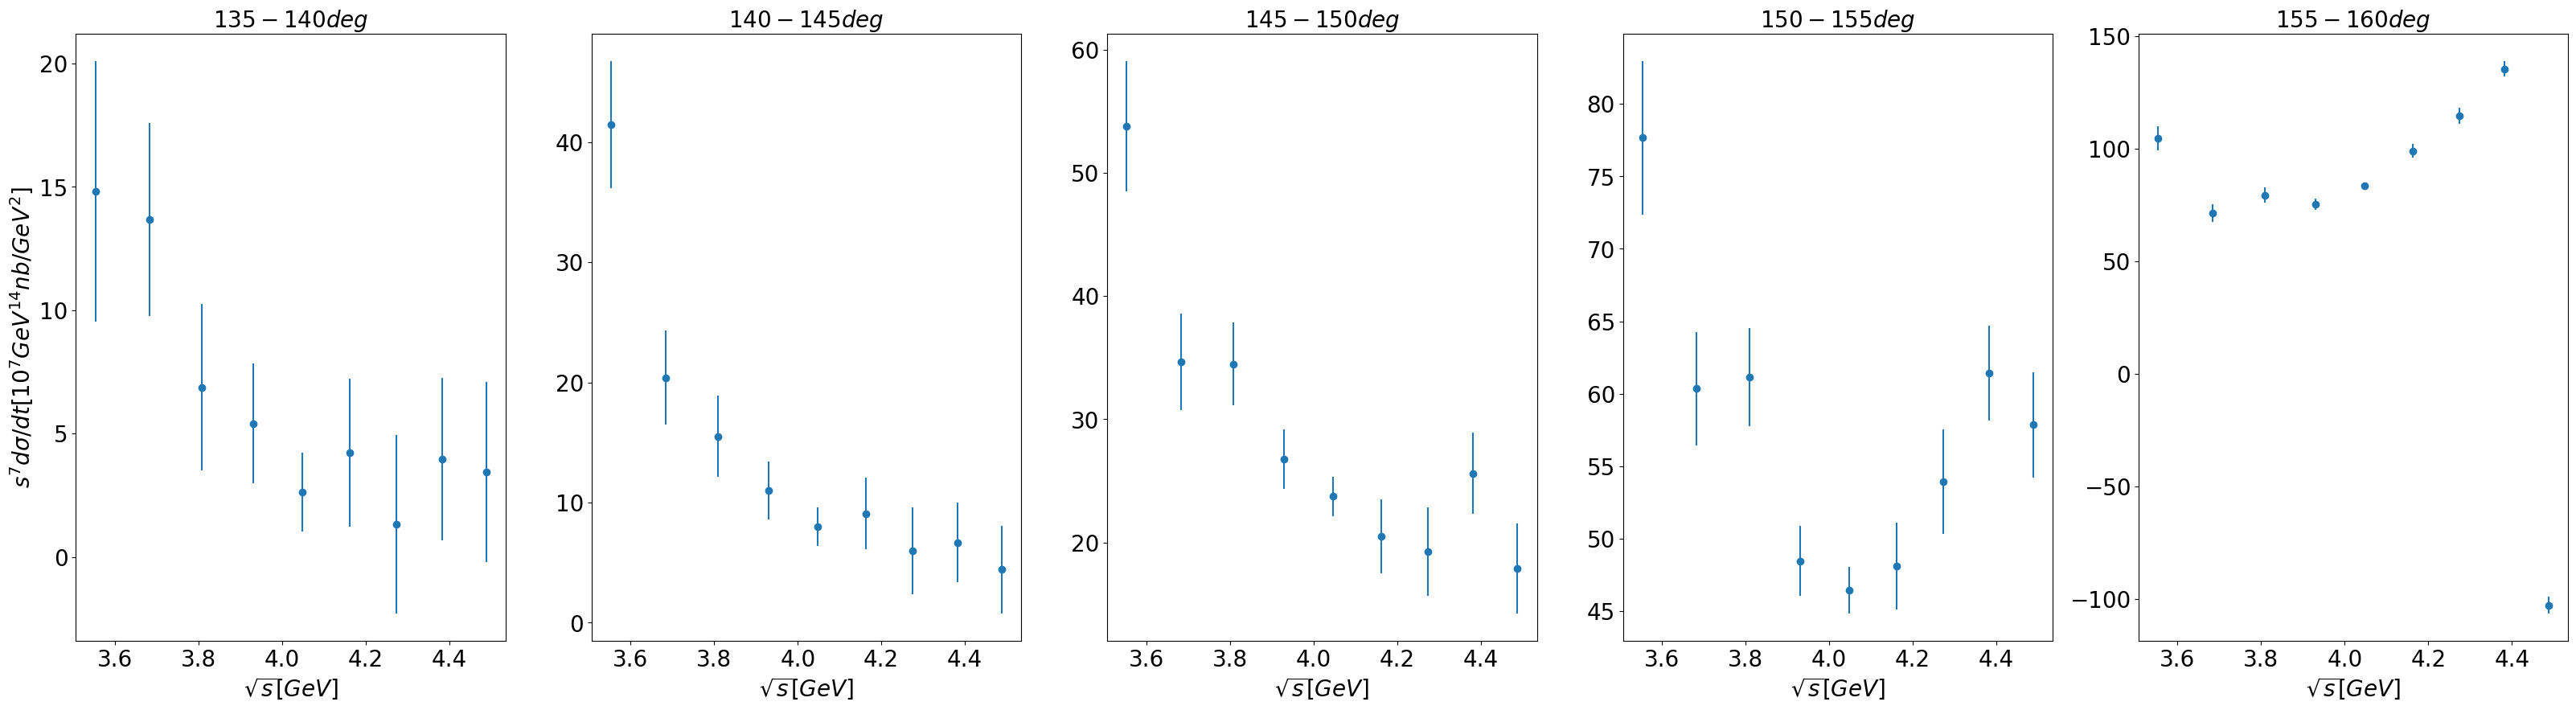

In [28]:
fig, ax = plt.subplots(1, 5, figsize=(40, 10), dpi=100)
ax[0].set_title("$135-140 deg$", fontsize=20)
ax[1].set_title("$140-145 deg$", fontsize=20)
ax[2].set_title("$145-150 deg$", fontsize=20)
ax[3].set_title("$150-155 deg$", fontsize=20)
ax[4].set_title("$155-160 deg$", fontsize=20)

for i in range(5):
    plt.axes(ax[i])
    if (i==0):
        plt.ylabel("$s^7 d\sigma/dt [10^7 GeV^{14} nb/GeV^2]$", fontsize=20)
    plt.xlabel("$\sqrt{s} [GeV]$", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
        
    plt.errorbar(np.sqrt(energy_com), scaled_cs[:,i+21], yerr = scaled_cs_error[:,4], fmt='o')